#Import Library and Dataset

In [ ]:
# Import the necessary libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib
matplotlib.use('Agg')  # Ensure we use a non-interactive backend
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Import scikit-learn modules for prediction
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

sns.set(style='whitegrid', context='notebook')

# A dry reminder: always double-check file paths when things fail mysteriously.

In [ ]:
# Load the dataset
try:
    df = pd.read_csv('/content/market_pipe_thickness_loss_dataset.csv')
    print('Data loaded successfully')
except Exception as e:
    print('Error loading data:', e)
    # Note: This kind of error may occur if the file path is incorrect or file encoding issues arise.

Data loaded successfully


#Data Overview

Let's take a look at the structure of the dataset. We will explore basic details such as the number of rows, data types, and some sample values.

In [ ]:
# Display the first few rows of the dataframe
print('First 5 rows of the dataset:\n')
df.head()

First 5 rows of the dataset:



,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7,Critical
3,1500,38.72,Carbon Steel,API 5L X42,1500,52.7,5.58,6.20,16.01,19,Critical
4,1500,24.32,HDPE,API 5L X65,1500,11.7,12.29,8.58,35.28,20,Critical


In [ ]:
# Display dataframe info
print('DataFrame Info:\n')
print(df.info())

DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pipe_Size_mm              1000 non-null   int64  
 1   Thickness_mm              1000 non-null   float64
 2   Material                  1000 non-null   object 
 3   Grade                     1000 non-null   object 
 4   Max_Pressure_psi          1000 non-null   int64  
 5   Temperature_C             1000 non-null   float64
 6   Corrosion_Impact_Percent  1000 non-null   float64
 7   Thickness_Loss_mm         1000 non-null   float64
 8   Material_Loss_Percent     1000 non-null   float64
 9   Time_Years                1000 non-null   int64  
 10  Condition                 1000 non-null   object 
dtypes: float64(5), int64(3), object(3)
memory usage: 86.1+ KB
None


In [ ]:
# Generate summary statistics for numeric features
print('Summary Statistics:\n')
df.describe()

Summary Statistics:



,Pipe_Size_mm,Thickness_mm,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,522.000000,16.073530,1004.100000,42.595600,9.745990,4.886300,46.747560,12.961000
std,443.703587,10.548358,812.843099,41.127071,5.817492,2.901123,46.602553,7.135993
min,50.000000,3.000000,150.000000,-50.000000,0.000000,0.010000,0.080000,1.000000
25%,150.000000,7.357500,300.000000,13.400000,4.492500,2.365000,15.665000,7.000000
50%,300.000000,12.930000,900.000000,41.200000,9.720000,4.915000,31.660000,13.000000
75%,800.000000,23.027500,1500.000000,69.150000,14.832500,7.432500,61.035000,19.000000
max,1500.000000,49.530000,2500.000000,149.700000,20.000000,9.990000,318.750000,25.000000


In [ ]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [ ]:
df.shape

(1000, 11)

In [ ]:
df["Grade"].unique()

array(['ASTM A333 Grade 6', 'ASTM A106 Grade B', 'API 5L X52',
       'API 5L X42', 'API 5L X65'], dtype=object)

#Data Cleaning and Preprocessing
We now check for missing values and ensure that the data types are appropriate for analysis. Note that this dataset does not include explicit date fields, so there is no need for date parsing.

In [ ]:
# Check for duplicate values
print('Duplicate values:')
print(df.duplicated().sum())
# Check for missing values
print('Missing values by column:')
print(df.isnull().sum())

# If there are missing values, one might choose to fill or drop them.
# For this example, we proceed assuming the dataset is clean.

# Confirm data types
print('\nData Types:')
print(df.dtypes)

Duplicate values:
0
Missing values by column:
Pipe_Size_mm                0
Thickness_mm                0
Material                    0
Grade                       0
Max_Pressure_psi            0
Temperature_C               0
Corrosion_Impact_Percent    0
Thickness_Loss_mm           0
Material_Loss_Percent       0
Time_Years                  0
Condition                   0
dtype: int64

Data Types:
Pipe_Size_mm                  int64
Thickness_mm                float64
Material                     object
Grade                        object
Max_Pressure_psi              int64
Temperature_C               float64
Corrosion_Impact_Percent    float64
Thickness_Loss_mm           float64
Material_Loss_Percent       float64
Time_Years                    int64
Condition                    object
dtype: object


#Exploratory Data Analysis
We now perform exploratory analysis on the dataset. We'll visualize distributions for the numeric variables and count distributions for the categorical ones. Hopefully, this will reveal interesting trends in the pipeline maintenance data.

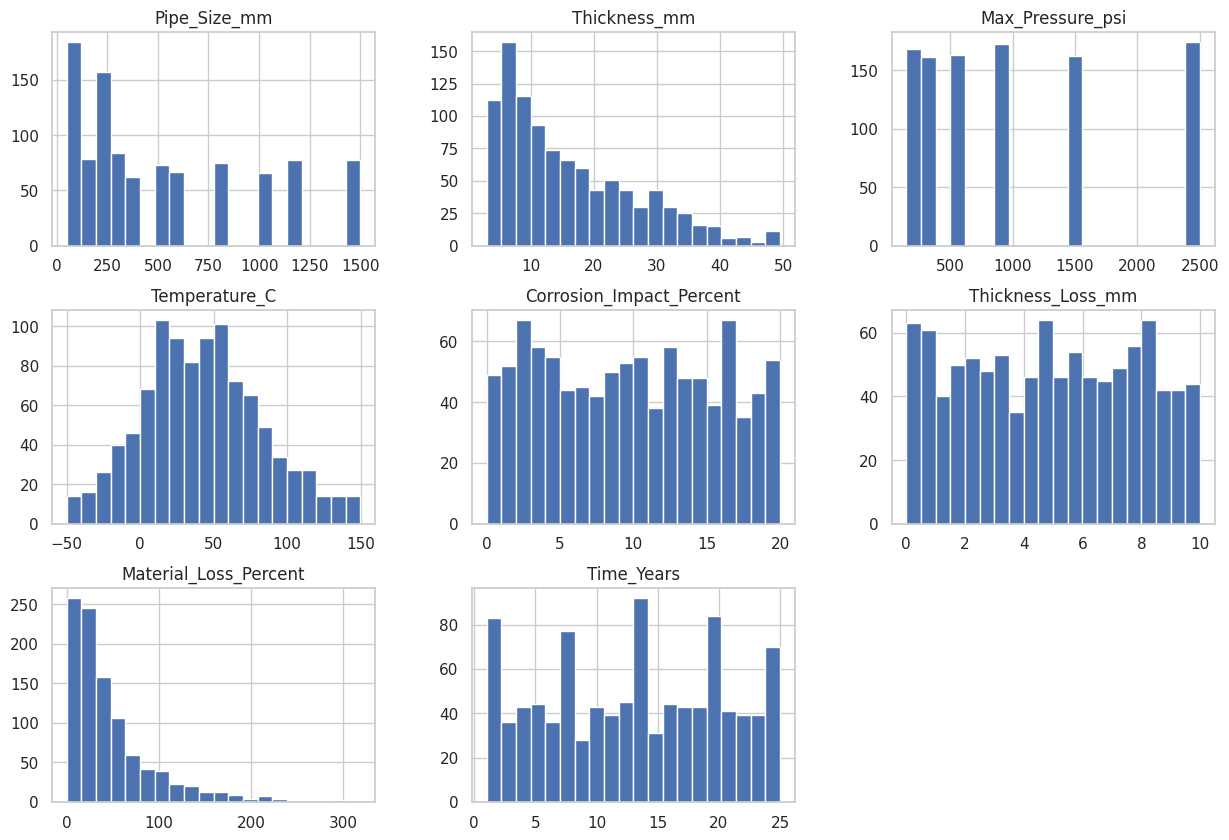

In [ ]:
# Histograms for numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_columns].hist(bins=20, figsize=(15,10));

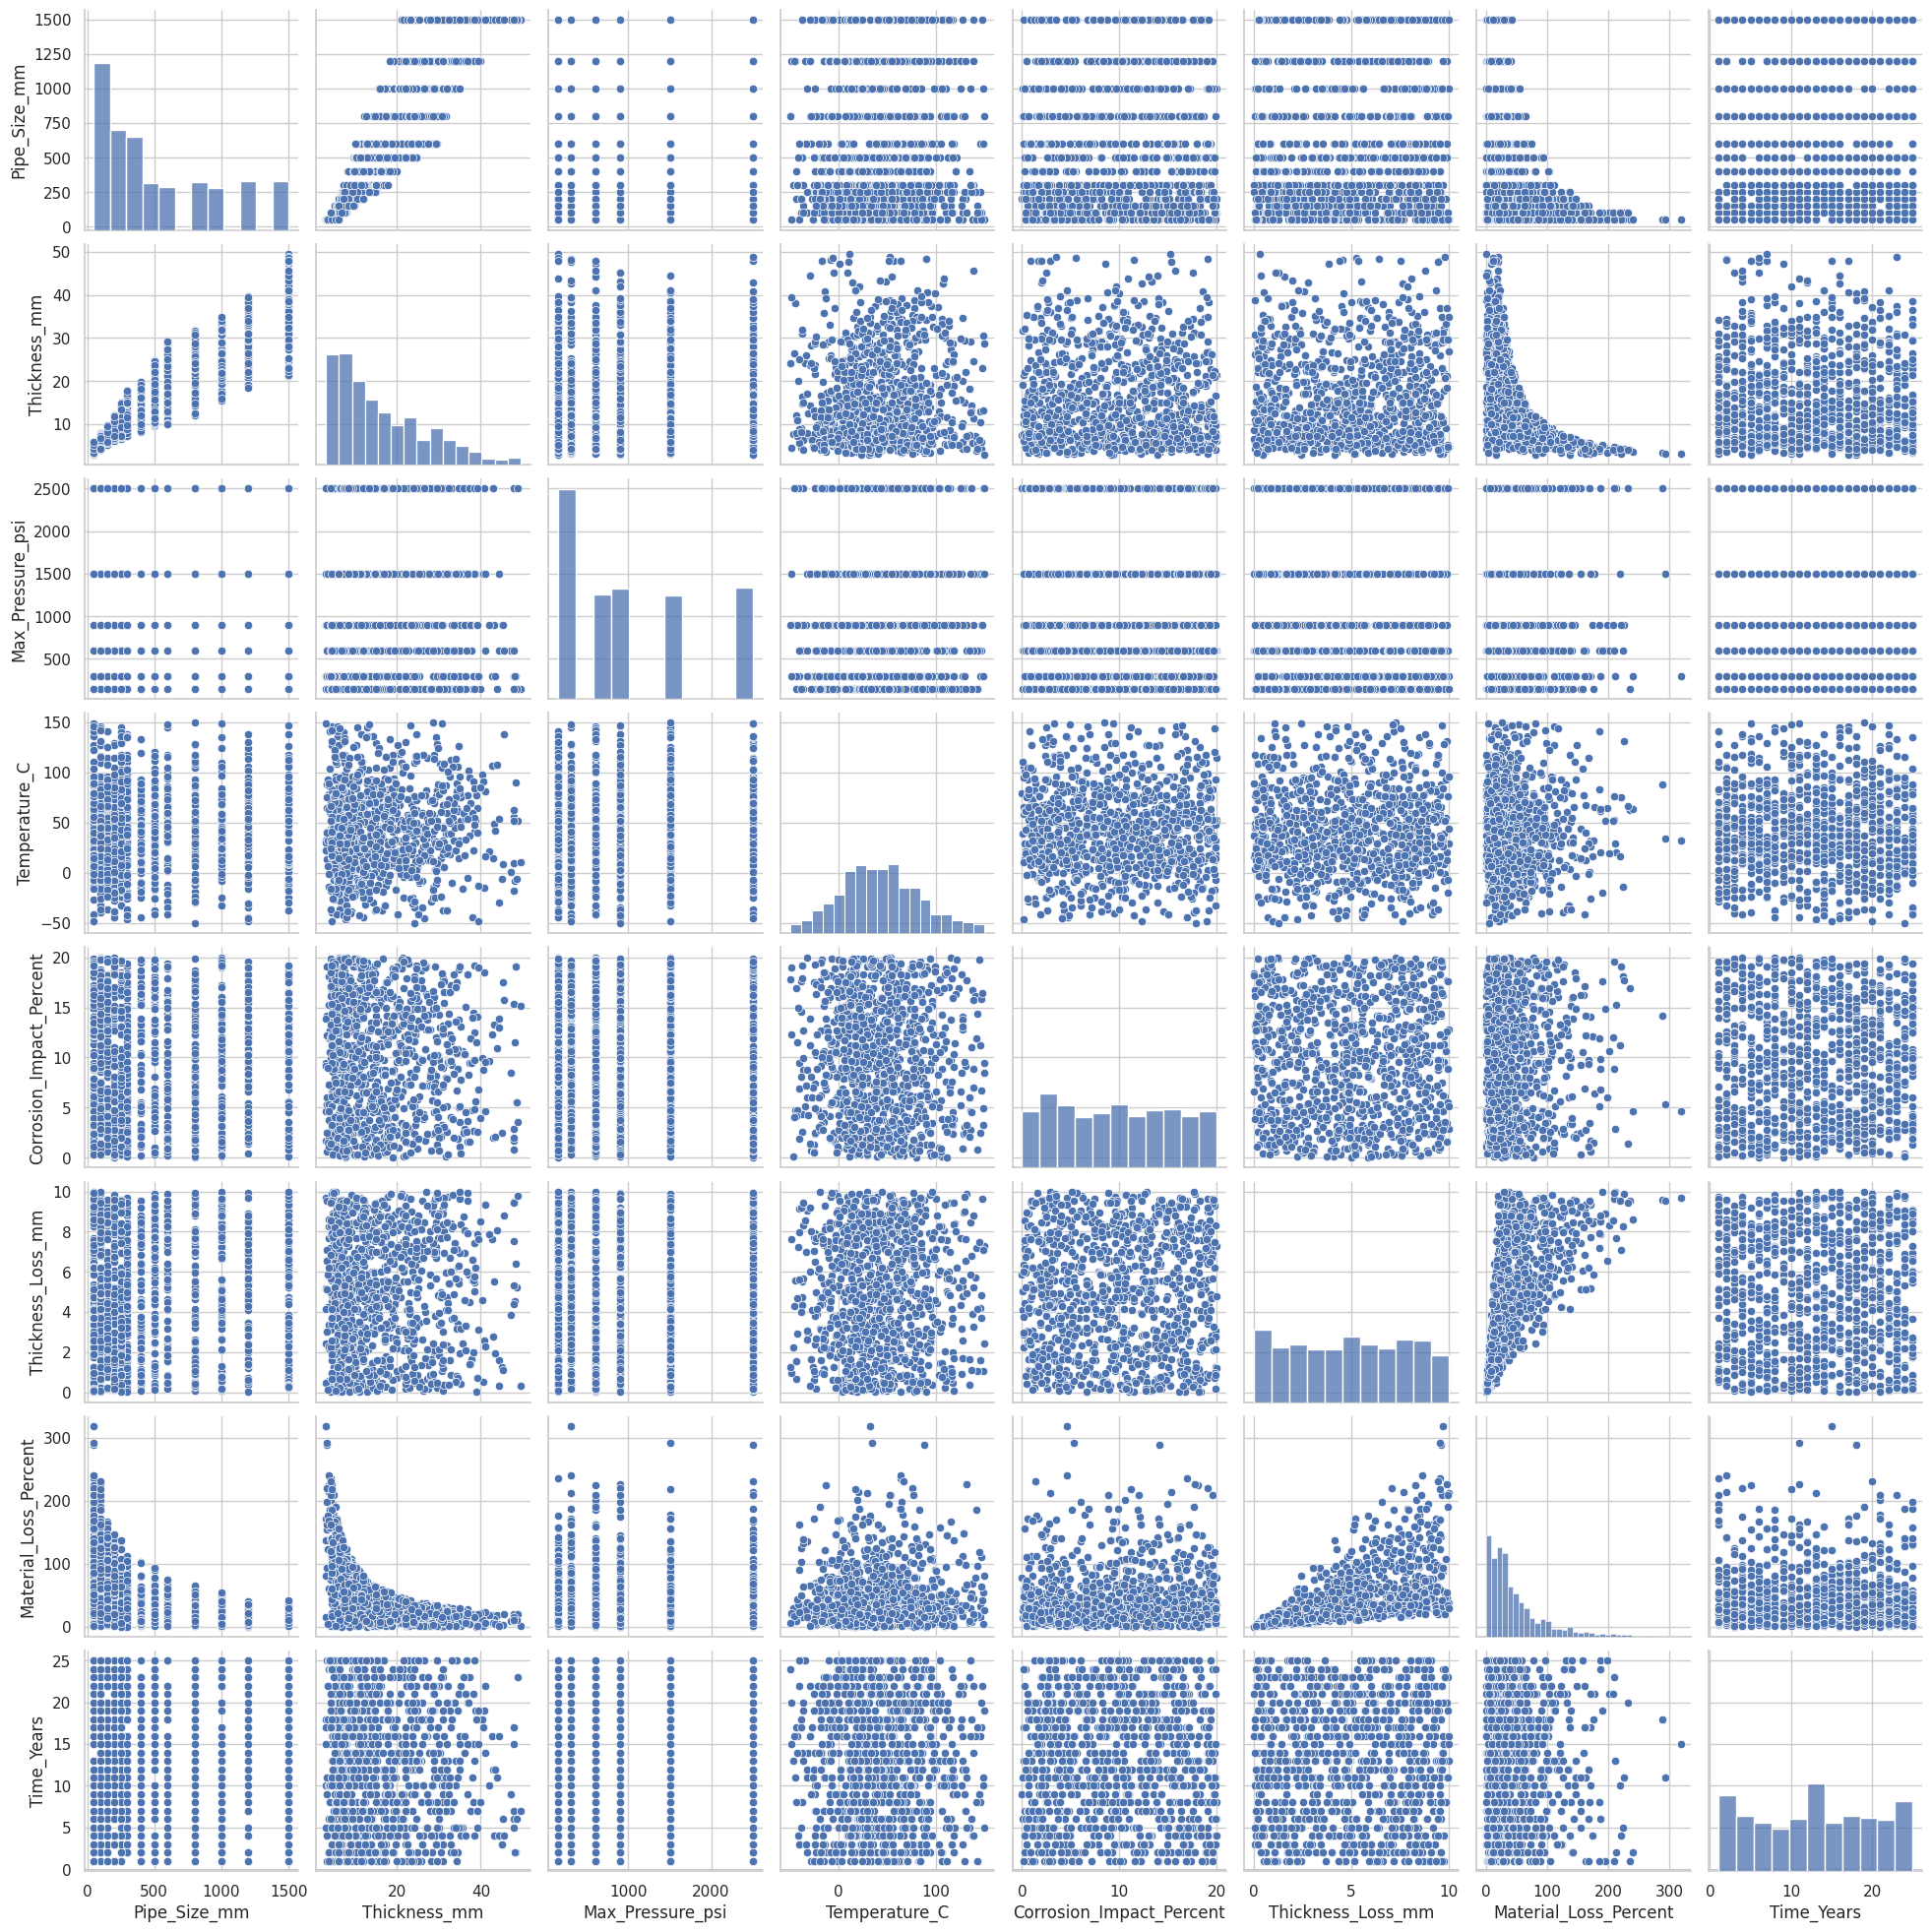

In [ ]:
# Pair plot for numeric features with some dry humor: sometimes numbers just want to be together
sns.pairplot(df[numeric_columns]);
plt.show()

###Material Distribution

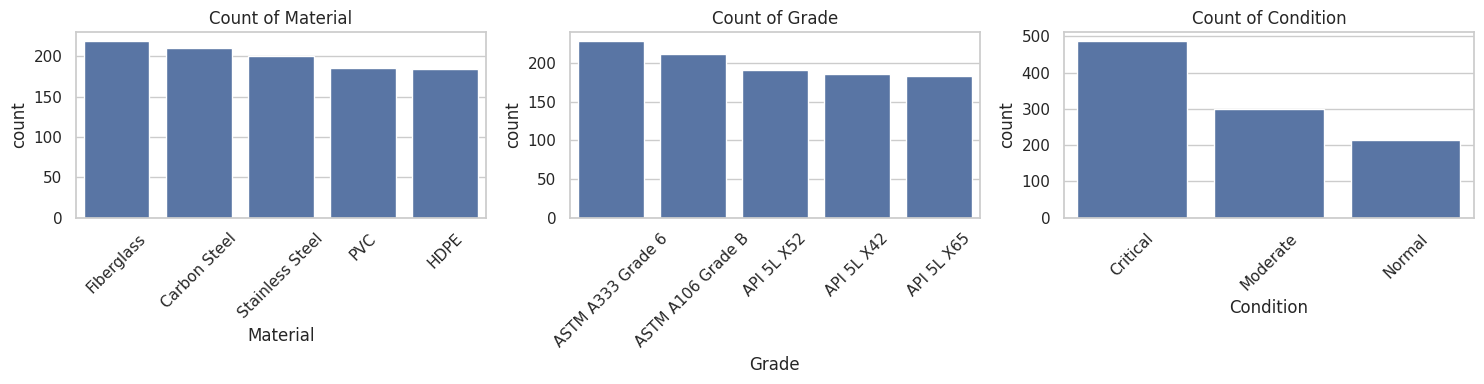

In [ ]:
# Count plots for categorical variables
categorical_columns = ['Material', 'Grade', 'Condition']
plt.figure(figsize=(15,4))
for i, col in enumerate(categorical_columns):
    plt.subplot(1, 3, i+1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Count of {col}')
plt.tight_layout();
plt.show()

This above graph show number of materials, grade and condition present in dataset

###Pipe size Distribution

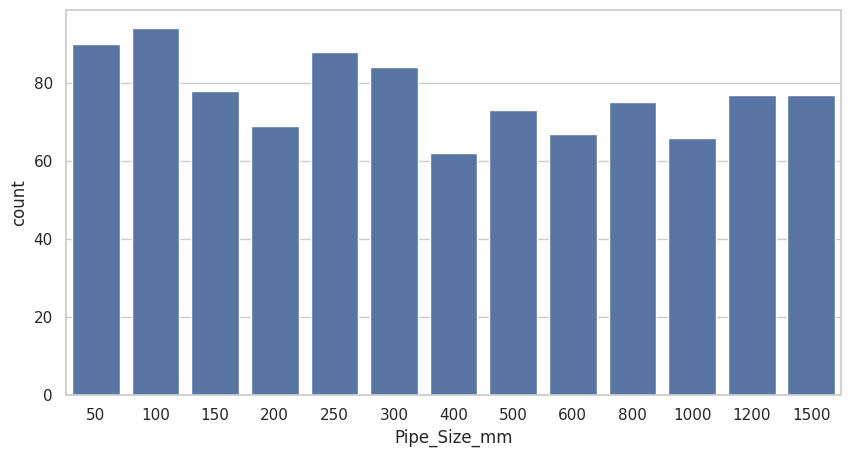

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'Pipe_Size_mm')
plt.show()

In above graph we can analye that pipe size range 50 to 1500 mm. 100 mm pipe is more in quantity and 400mm pipe is least amoung all.

###Time distribution in years

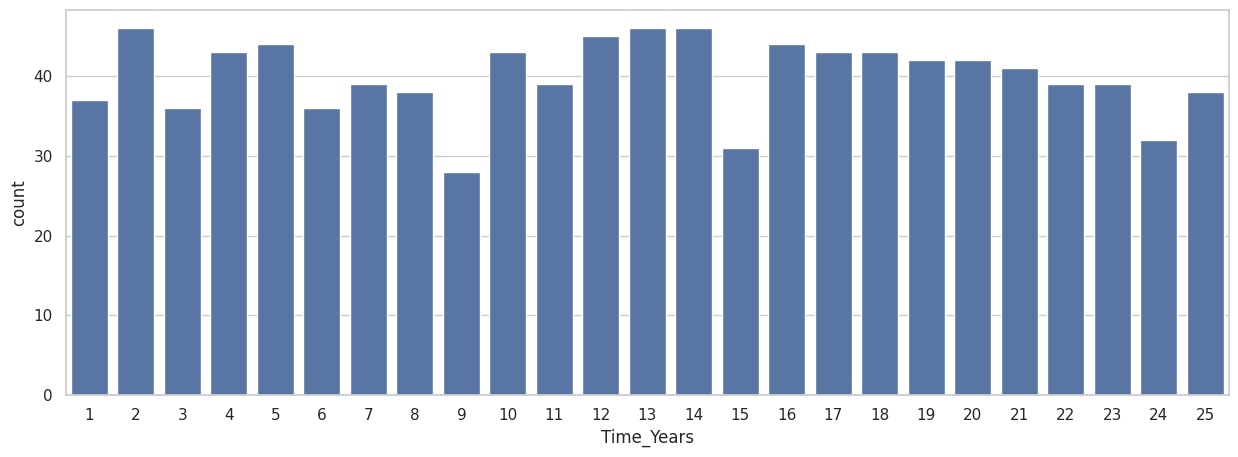

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'Time_Years')
plt.show()

In above graph we can analysis that material Condition of pipeline over the years and year range vary from 1 year to 25 years

###Materials condition distribution

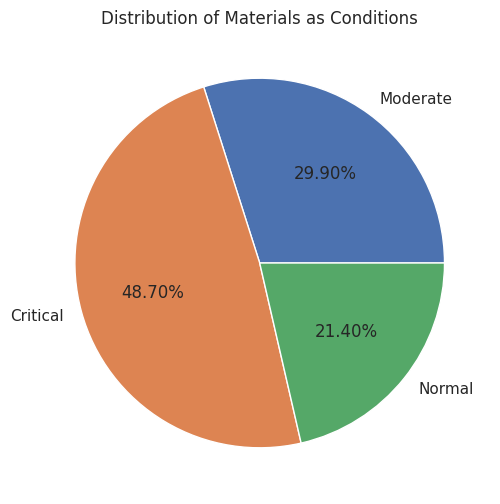

In [ ]:
plt.figure(figsize = (6,6))
Moderate_B = df.loc[(df['Condition'] == 'Moderate')].count()
Critical_C = df.loc[(df['Condition'] == 'Critical')].count()
Normal_A = df.loc[(df['Condition'] == 'Normal')].count()


#print(groupA['EthnicGroup'])

mlist = [Moderate_B['Condition'], Critical_C['Condition'], Normal_A['Condition']]

l = ['Moderate', 'Critical', 'Normal']

plt.pie(mlist, labels = l, autopct = '%1.2f%%')
#print(mlist)
plt.title('Distribution of Materials as Conditions')

plt.show()

In this graph there is 3 conditions of pipeline material present in data and most dangerious condition is critical condition so first periority of inspection and maintenance is that material which condition is critical.

###What is impact of Material_Loss_Percent on Condition of Material?

In [ ]:
figure = px.bar(df, x = df["Material"], y = df["Condition"], color = df["Material_Loss_Percent"],
                title = "team wins by wickets all matches")
figure.show()

##Correlation Heatmap
We now compute and display the correlation heatmap for numeric features. Given that there are more than four numeric columns, this visualization helps us understand how features interact in ways as subtle as pipeline corrosion.

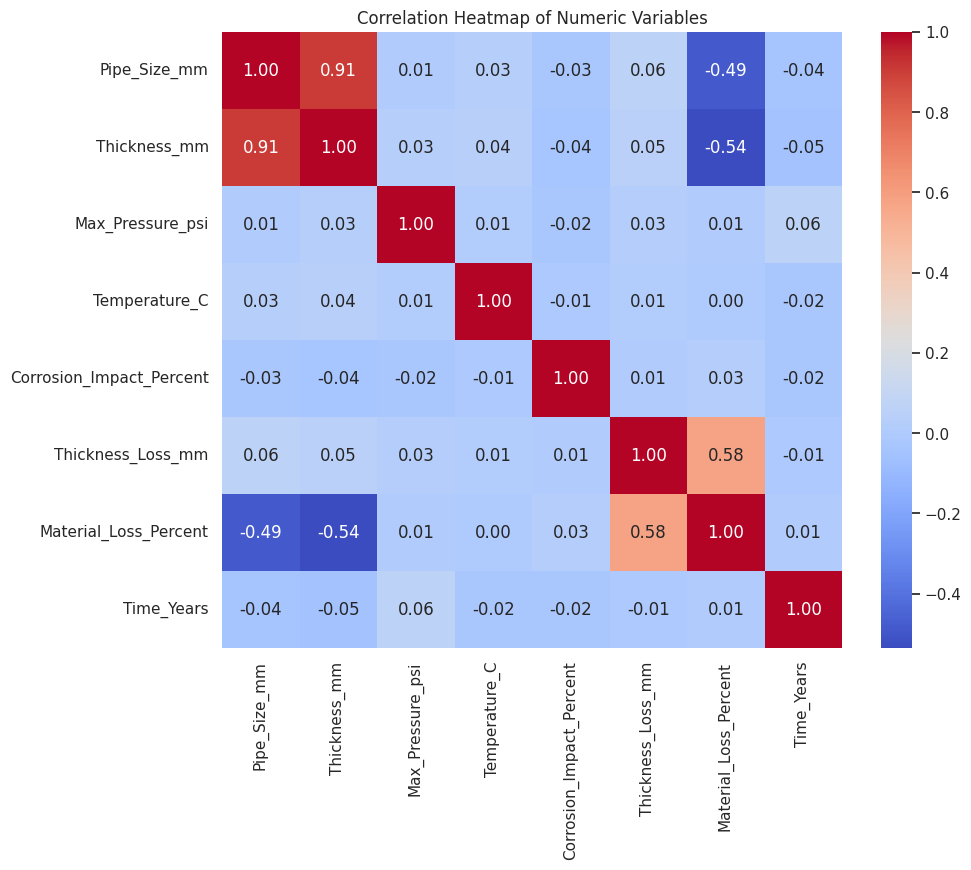

In [ ]:
# Reduce the dataframe to only numeric values
numeric_df = df.select_dtypes(include=[np.number])

if numeric_df.shape[1] >= 4:
    corr_matrix = numeric_df.corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Variables')
    plt.show()
else:
    print('Not enough numeric columns to generate a correlation heatmap.')

##Encoding

Different types of encoding below

###One Hot Encoding

Encoding mean convert categorical data into numerical data(0,1)

One hot Encoding is applied on limited number of data. for example yes or no, male or female, urban or rural etc.

To perform one hot encoding, there are 2 methods. one is Get dummies(Pandas method) and second is one hot encoder class in skitlearn library

####Get dumies

In [ ]:
en_data = df[["Material","Grade", "Condition"]]
en_data.head(3)

,Material,Grade,Condition
0,Carbon Steel,ASTM A333 Grade 6,Moderate
1,PVC,ASTM A106 Grade B,Critical
2,Carbon Steel,API 5L X52,Critical


In [ ]:
pd.get_dummies(en_data)

,Material_Carbon Steel,Material_Fiberglass,Material_HDPE,Material_PVC,Material_Stainless Steel,Grade_API 5L X42,Grade_API 5L X52,Grade_API 5L X65,Grade_ASTM A106 Grade B,Grade_ASTM A333 Grade 6,Condition_Critical,Condition_Moderate,Condition_Normal
0,True,False,False,False,False,False,False,False,False,True,False,True,False
1,False,False,False,True,False,False,False,False,True,False,True,False,False
2,True,False,False,False,False,False,True,False,False,False,True,False,False
3,True,False,False,False,False,True,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,True,False,False,False,True,False,False,True,False,False
996,True,False,False,False,False,False,False,False,False,True,False,False,True
997,False,False,False,True,False,False,False,False,True,False,True,False,False
998,False,False,True,False,False,True,False,False,False,False,True,False,False


####one hot encoder in sikitlean libarary

sklrean is module, preprocessing is a file present in sklearn and import class that name is one hot encoder in preprocessing file

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Step 1. Fit_transform convert category data into 0 and 1 form
ohe = OneHotEncoder()
ohe.fit_transform(en_data)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3000 stored elements and shape (1000, 13)>

sparse matrix is a matrix that fill element in the form of 0 and 1

In [ ]:
#step 2. convert it into array
ohe = OneHotEncoder()
ohe.fit_transform(en_data).toarray()

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [ ]:
#Step 3. Convert it into data frame
ohe = OneHotEncoder()
ar = ohe.fit_transform(en_data).toarray()
pd.DataFrame(ar, columns = ['Condition_Moderate','Condition_Critical','Condition_Normal',
                            'Material_Carbon Steel','Material_Fiberglass','Material_HDPE',
                            'Material_PVC','Material_Stainless Steel','Grade_API 5L X42',
                            'Grade_API 5L X52','Grade_API 5L X65','Grade_ASTM A106 Grade B',
                            'Grade_ASTM A333 Grade 6'])

,Condition_Moderate,Condition_Critical,Condition_Normal,Material_Carbon Steel,Material_Fiberglass,Material_HDPE,Material_PVC,Material_Stainless Steel,Grade_API 5L X42,Grade_API 5L X52,Grade_API 5L X65,Grade_ASTM A106 Grade B,Grade_ASTM A333 Grade 6
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
997,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
998,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


###Label Encoding

Label encoding is perform on nominal data. Nominal is data that have no order or secquences with each other. i.e cow, buffalo, parrot and dog. these are in animal category but there is no connection and sequences with each others.

In [ ]:
df = pd.read_csv('/content/market_pipe_thickness_loss_dataset.csv')
df.head(2)

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df['Condition'].unique()

array(['Moderate', 'Critical', 'Normal'], dtype=object)

In [ ]:
la = LabelEncoder()
la.fit(df['Condition'])

LabelEncoder()

In [ ]:
la.transform(df["Condition"])

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 1, 0, 0,
       2, 1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 2, 2,
       2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 0, 2, 1, 1, 2, 0,
       1, 2, 0, 0, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0,
       2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0,
       2, 2, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 2, 2,
       0, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 0, 1, 2, 2, 2, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 0, 1, 0,
       0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1,
       1, 2, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1,

This in encoding in the form of array

In [ ]:
df['Condition'] = la.transform(df['Condition'])

In [ ]:
df.head(3)

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,1
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,0
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7,0


###Ordinal Encoding

Two methods

1. SKLEARN
2. MAP FUNCTION

SKLEARN

In [ ]:
df = pd.read_csv('/content/market_pipe_thickness_loss_dataset.csv')
df.head(2)

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical


In [ ]:
df['Condition'].unique()

array(['Moderate', 'Critical', 'Normal'], dtype=object)

In [ ]:
#Step.1 Create order
en_data_ord = ['Moderate', 'Critical', 'Normal']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oen = OrdinalEncoder(categories=[en_data_ord])

In [ ]:
#Step 2. Fit order
#Step 3.Transform order Togather
oen.fit_transform(df[['Condition']])

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [0.],
       [0.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [0.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [1.],
       [2.],
       [0.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [2.],

In [ ]:
df["Condition"] = oen.fit_transform(df[["Condition"]])

In [ ]:
df.head(3)

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,0.0
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,1.0
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7,1.0


MAP FUNCTION

In [ ]:
df = pd.read_csv('/content/market_pipe_thickness_loss_dataset.csv')
df.head(2)

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical


In [ ]:
df['Condition'].unique()

array(['Moderate', 'Critical', 'Normal'], dtype=object)

In [ ]:
#Step 1. Create Dictionary to given order
ord_data = {'Moderate':0, 'Critical':1, 'Normal':2}

In [ ]:
df['Condition'].map(ord_data)

,Condition
0,0
1,1
2,1
3,1
4,1
...,...
995,1
996,2
997,1
998,1


In [ ]:
#step 3. Create new column to save this encoded data
df['Condition_en_map'] = df['Condition'].map(ord_data)

In [ ]:
df.head(3)

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition,Condition_en_map
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate,0
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical,1
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7,Critical,1


###Outlier

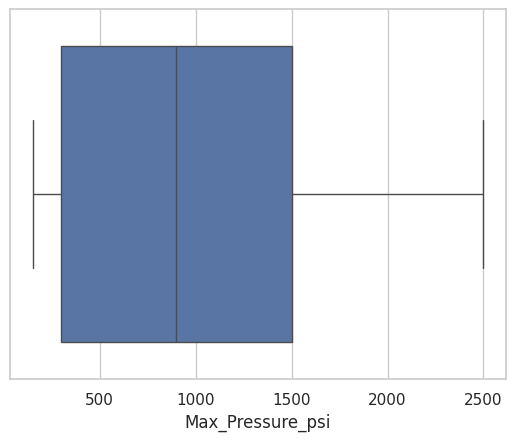

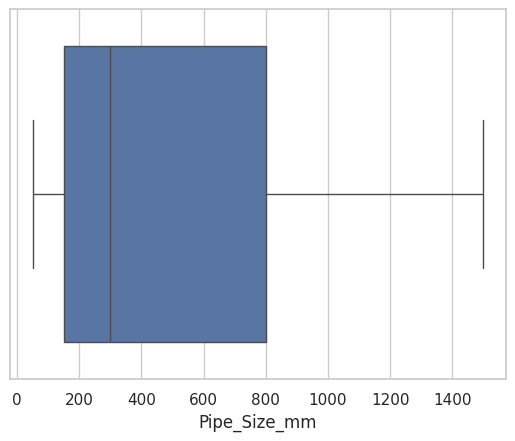

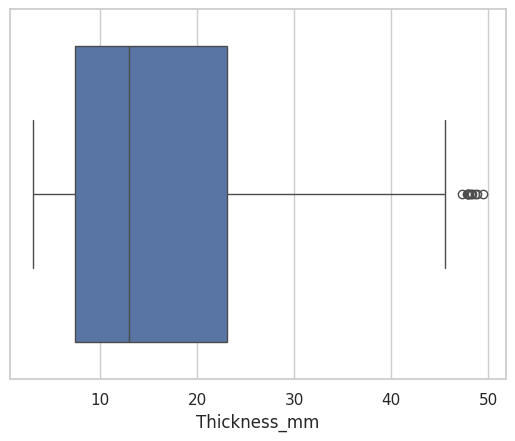

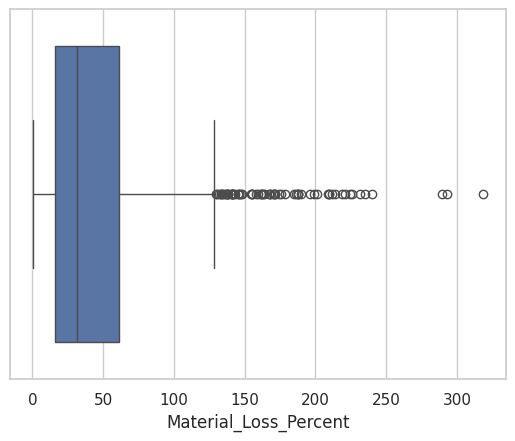

In [ ]:
sns.boxplot(data = df, x = "Max_Pressure_psi")
plt.show()
sns.boxplot(data = df, x = "Pipe_Size_mm")
plt.show()
sns.boxplot(data = df, x = "Thickness_mm")
plt.show()
sns.boxplot(data = df, x = "Material_Loss_Percent")
plt.show()

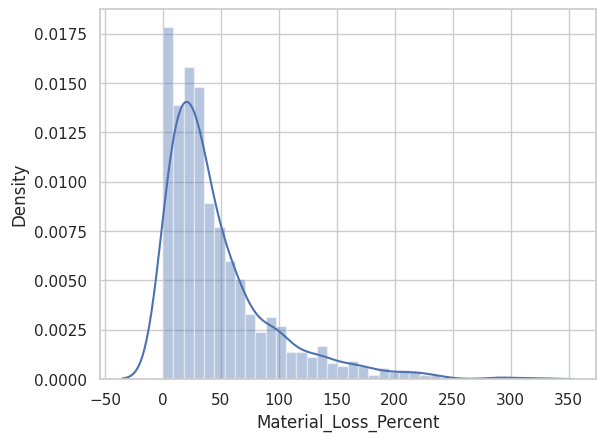

In [ ]:
sns.distplot(df['Material_Loss_Percent'])
plt.show()

when we use dist plot we can there is a long tail shows outlier. but best way to see outlier is box plot. if we do not remove outlier then ML algorithem will predict wrong prediction because of statistical problem like mean, median, standard deviation and mode

Two Method

1.IQR Method

2.Z Score Method

IQR Method

In [ ]:
df.head(3)

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition,Condition_en_map
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate,0
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical,1
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7,Critical,1


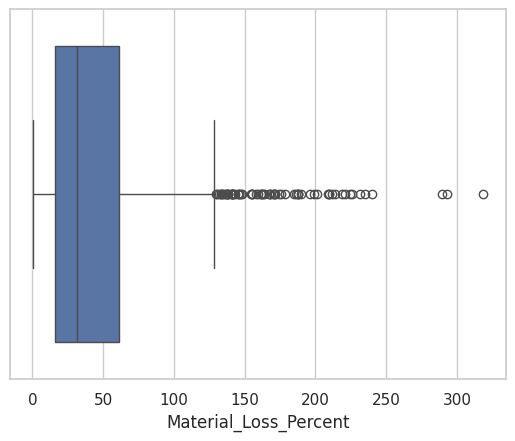

In [ ]:
sns.boxplot(data = df, x = "Material_Loss_Percent")
plt.show()

In [ ]:
q1 = df['Material_Loss_Percent'].quantile(0.25)
q1

np.float64(15.665)

In [ ]:
q3 = df['Material_Loss_Percent'].quantile(0.75)
q3

np.float64(61.035000000000004)

In [ ]:
IQR = q3-q1
IQR

np.float64(45.370000000000005)

In [ ]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)
min_range, max_range

(np.float64(-52.39000000000001), np.float64(129.09))

min range is negative but data is not negative so neglect it. we will use max range

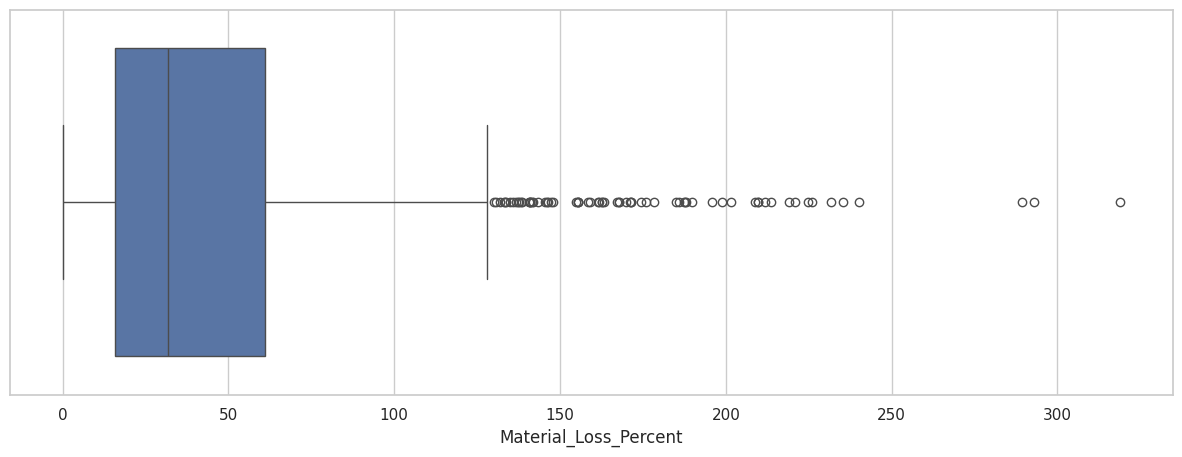

In [ ]:
#if we zoom plot we can see maximum range

plt.figure(figsize = (15,5))
sns.boxplot(data = df, x = "Material_Loss_Percent")
plt.show()

In [ ]:
new_df = df[df["Material_Loss_Percent"]<=max_range]

In [ ]:
new_df

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition,Condition_en_map
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate,0
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical,1
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7,Critical,1
3,1500,38.72,Carbon Steel,API 5L X42,1500,52.7,5.58,6.20,16.01,19,Critical,1
4,1500,24.32,HDPE,API 5L X65,1500,11.7,12.29,8.58,35.28,20,Critical,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1500,34.85,PVC,API 5L X65,150,96.2,5.16,9.98,28.64,15,Critical,1
996,800,12.53,Carbon Steel,ASTM A333 Grade 6,150,6.5,6.54,1.07,8.54,23,Normal,2
997,100,6.77,PVC,ASTM A106 Grade B,600,44.7,15.90,6.22,91.88,15,Critical,1
998,300,15.05,HDPE,API 5L X42,600,37.9,6.60,5.39,35.81,12,Critical,1


This above data is new data after removal of outlier in CoapplicantIncome column.

now we check rows old dataset and new data set

In [ ]:
df.shape

(1000, 12)

In [ ]:
new_df.shape

(930, 12)

we can analyse that 70 outlier were present in the dataset

new box plot graph after removal of outlier

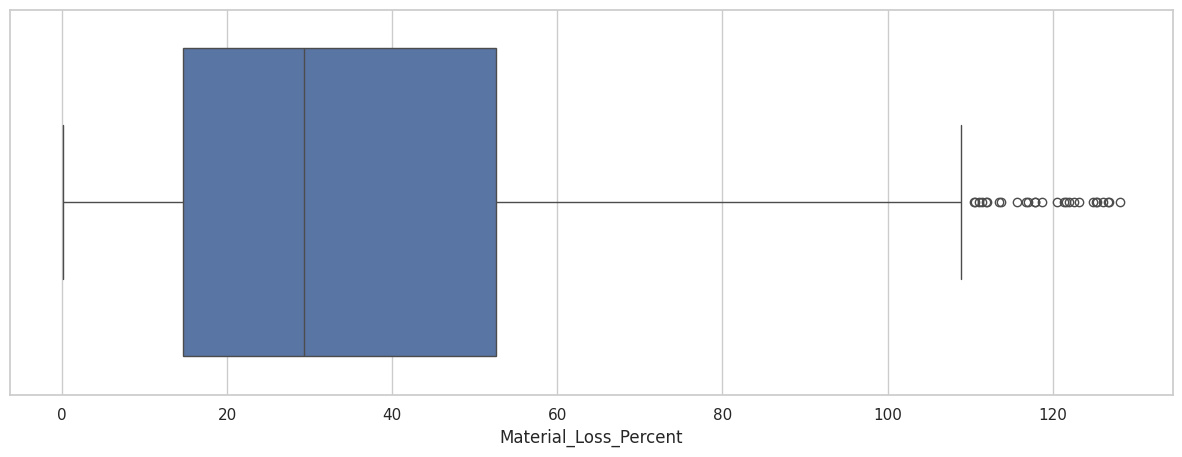

In [ ]:
plt.figure(figsize = (15,5))
sns.boxplot(data = new_df, x = "Material_Loss_Percent")
plt.show()

we can analyse that maximum outlier will be removed. there is a still few outlier outlier is present that is near to maximum range, so we can ignore it because byremoval outlier, our data is also loss and may be this data is important to our prediction. so we shoud remove minimum data as possible

if outlier is not effected on algorithem, for example decesion tree algorithm, so it is possibility to not remove outlier. but we use linear regression

Z Score method

In [ ]:
df.head(3)

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition,Condition_en_map
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate,0
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical,1
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7,Critical,1


In [ ]:
min_range = df["Material_Loss_Percent"].mean() - (3*df["Material_Loss_Percent"].std())
max_range = df['Material_Loss_Percent'].mean() + (3*df["Material_Loss_Percent"].std())

In [ ]:
min_range, max_range

(np.float64(-93.06009949214042), np.float64(186.55521949214045))

We neglect min range because it is ngative and we have no data in negative. we will consider +ve value i.e max range. after this max range we will remove all data because it is outlier

In [ ]:
df[df["Material_Loss_Percent"]<=max_range]

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition,Condition_en_map
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate,0
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical,1
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7,Critical,1
3,1500,38.72,Carbon Steel,API 5L X42,1500,52.7,5.58,6.20,16.01,19,Critical,1
4,1500,24.32,HDPE,API 5L X65,1500,11.7,12.29,8.58,35.28,20,Critical,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1500,34.85,PVC,API 5L X65,150,96.2,5.16,9.98,28.64,15,Critical,1
996,800,12.53,Carbon Steel,ASTM A333 Grade 6,150,6.5,6.54,1.07,8.54,23,Normal,2
997,100,6.77,PVC,ASTM A106 Grade B,600,44.7,15.90,6.22,91.88,15,Critical,1
998,300,15.05,HDPE,API 5L X42,600,37.9,6.60,5.39,35.81,12,Critical,1


In [ ]:
new_df = df[df["Material_Loss_Percent"]<=max_range]

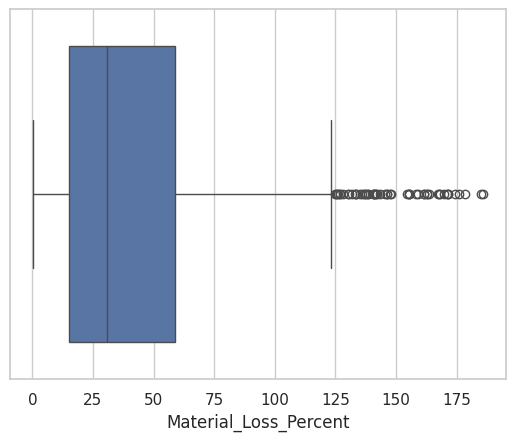

In [ ]:
sns.boxplot(data = new_df, x = "Material_Loss_Percent")
plt.show()

In [ ]:
#Z_Score Method
z_score = (df['Material_Loss_Percent'] - df['Material_Loss_Percent'].mean()) / (df["Material_Loss_Percent"].std())

In [ ]:
z_score

,Material_Loss_Percent
0,-0.322462
1,-0.289202
2,0.122363
3,-0.659568
4,-0.246071
...,...
995,-0.388553
996,-0.819860
997,0.968454
998,-0.234699


In [ ]:
z_score>3

,Material_Loss_Percent
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [ ]:
df["z_score"] = z_score

In [ ]:
df

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition,Condition_en_map,z_score
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate,0,-0.322462
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical,1,-0.289202
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7,Critical,1,0.122363
3,1500,38.72,Carbon Steel,API 5L X42,1500,52.7,5.58,6.20,16.01,19,Critical,1,-0.659568
4,1500,24.32,HDPE,API 5L X65,1500,11.7,12.29,8.58,35.28,20,Critical,1,-0.246071
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1500,34.85,PVC,API 5L X65,150,96.2,5.16,9.98,28.64,15,Critical,1,-0.388553
996,800,12.53,Carbon Steel,ASTM A333 Grade 6,150,6.5,6.54,1.07,8.54,23,Normal,2,-0.819860
997,100,6.77,PVC,ASTM A106 Grade B,600,44.7,15.90,6.22,91.88,15,Critical,1,0.968454
998,300,15.05,HDPE,API 5L X42,600,37.9,6.60,5.39,35.81,12,Critical,1,-0.234699


In [ ]:
z_score1 = df[df["z_score"]<3]
z_score1

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition,Condition_en_map,z_score
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate,0,-0.322462
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical,1,-0.289202
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7,Critical,1,0.122363
3,1500,38.72,Carbon Steel,API 5L X42,1500,52.7,5.58,6.20,16.01,19,Critical,1,-0.659568
4,1500,24.32,HDPE,API 5L X65,1500,11.7,12.29,8.58,35.28,20,Critical,1,-0.246071
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1500,34.85,PVC,API 5L X65,150,96.2,5.16,9.98,28.64,15,Critical,1,-0.388553
996,800,12.53,Carbon Steel,ASTM A333 Grade 6,150,6.5,6.54,1.07,8.54,23,Normal,2,-0.819860
997,100,6.77,PVC,ASTM A106 Grade B,600,44.7,15.90,6.22,91.88,15,Critical,1,0.968454
998,300,15.05,HDPE,API 5L X42,600,37.9,6.60,5.39,35.81,12,Critical,1,-0.234699


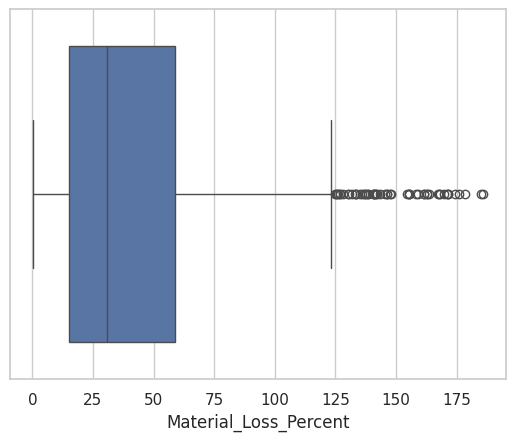

In [ ]:
sns.boxplot(data = z_score1, x = "Material_Loss_Percent")
plt.show()

In [ ]:
new_df.shape

(978, 12)

In [ ]:
z_score1.shape

(978, 13)

when we put <3 then rows reduces from 614 to 608. we can compare result between z_score method and direct method below, result will be same

###Feature Scaling

Feacture scalling is a technique that is used to balance data between large data and small data. if we do not this then ML will give the importance to large data and neglect small data, even small data is important to train algorithm so we need feature scalling. Data nature will be same after feature scalling for example if data follow normal distribution but magnitude of data i.e number, then data reduces(pattern changes) and it depends on types of feature scalling. Before training the model, it is important to do feature scalling for the improvement of the data

Two types of Feature Scalling

(1-Standardization), (2.Normalization)

Standardization

It is very effective technique which re-scales a feature value so that it has distribution with 0 mean and varience equals to 1

formula Xnew = Xi - Xmean / Standard Deviation

In scalling there is question, After performing scaling outlier will be removed or not? the answer is NO, only magnitude will be changed

In [ ]:
df.head(3)

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition,Condition_en_map,z_score
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate,0,-0.322462
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical,1,-0.289202
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7,Critical,1,0.122363


Two methods sklearn and direct.

we will perform sklearn method

In [ ]:
from sklearn.preprocessing import StandardScaler

if we want to train model then we fit and then tranform seprately otherwise we can do both at a time

In [ ]:
ss = StandardScaler()
ss.fit(df[["Material_Loss_Percent"]])

StandardScaler()

Also 2 method to add new column

1st Method

In [ ]:
Material_Loss_Percent_ss = ss.transform(df[["Material_Loss_Percent"]])

In [ ]:
Material_Loss_Percent_ss

array([[-3.22623513e-01],
       [-2.89346890e-01],
       [ 1.22424480e-01],
       [-6.59898186e-01],
       [-2.46194625e-01],
       [-3.35934162e-01],
       [ 2.61971608e-01],
       [-5.36237962e-01],
       [-4.05063662e-01],
       [-9.59387791e-01],
       [ 6.36387286e-01],
       [-2.39968676e-01],
       [-8.63636993e-01],
       [ 1.52798609e+00],
       [ 2.73779442e-01],
       [ 1.50458511e+00],
       [-6.76214466e-01],
       [-9.95670045e-01],
       [-6.26364797e-02],
       [ 6.50556687e-01],
       [ 8.59877379e-01],
       [ 1.86526076e+00],
       [-9.48868085e-01],
       [-3.05663170e-01],
       [-4.55730004e-01],
       [-8.56337605e-01],
       [-1.71912615e-01],
       [ 7.36646530e-01],
       [-9.87941281e-01],
       [-5.91412750e-01],
       [ 4.83529510e-01],
       [-9.31693054e-01],
       [-7.27268105e-02],
       [ 1.17701347e-01],
       [ 3.20040474e+00],
       [ 4.04820722e+00],
       [ 7.67132211e-01],
       [-9.51014964e-01],
       [-3.1

In [ ]:
df["Material_Loss_Percent_ss"] = Material_Loss_Percent_ss

In [ ]:
df.head(2)

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition,Condition_en_map,z_score,Material_Loss_Percent_ss
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate,0,-0.322462,-0.322624
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical,1,-0.289202,-0.289347


2nd Method

In [ ]:
df["Material_Loss_Percent_ss"] = pd.DataFrame(ss.transform(df[["Material_Loss_Percent"]]), columns = ["x"])

In [ ]:
df.head(3)

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition,Condition_en_map,z_score,Material_Loss_Percent_ss
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate,0,-0.322462,-0.322624
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical,1,-0.289202,-0.289347
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7,Critical,1,0.122363,0.122424


In [ ]:
df.describe()

,Pipe_Size_mm,Thickness_mm,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition_en_map,z_score,Material_Loss_Percent_ss
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,522.000000,16.073530,1004.100000,42.595600,9.745990,4.886300,46.747560,12.961000,0.915000,-1.527667e-16,-1.563194e-16
std,443.703587,10.548358,812.843099,41.127071,5.817492,2.901123,46.602553,7.135993,0.711534,1.000000e+00,1.000500e+00
min,50.000000,3.000000,150.000000,-50.000000,0.000000,0.010000,0.080000,1.000000,0.000000,-1.001395e+00,-1.001896e+00
25%,150.000000,7.357500,300.000000,13.400000,4.492500,2.365000,15.665000,7.000000,0.000000,-6.669712e-01,-6.673049e-01
50%,300.000000,12.930000,900.000000,41.200000,9.720000,4.915000,31.660000,13.000000,1.000000,-3.237496e-01,-3.239116e-01
75%,800.000000,23.027500,1500.000000,69.150000,14.832500,7.432500,61.035000,19.000000,1.000000,3.065806e-01,3.067340e-01
max,1500.000000,49.530000,2500.000000,149.700000,20.000000,9.990000,318.750000,25.000000,2.000000,5.836642e+00,5.839563e+00


Now we will check our data nature is changed or not?

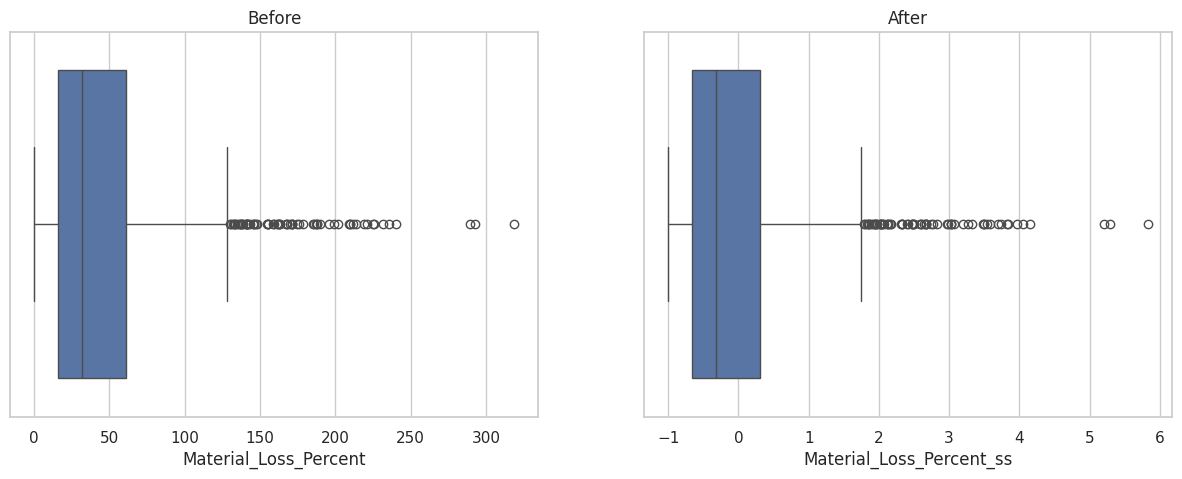

In [ ]:
# 1 mean row, 2 mean column, 1 show position 1

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("Before")
sns.boxplot(data = df, x = "Material_Loss_Percent")


plt.subplot(1,2,2)
plt.title("After")
sns.boxplot(data = df, x = "Material_Loss_Percent_ss")


plt.show()

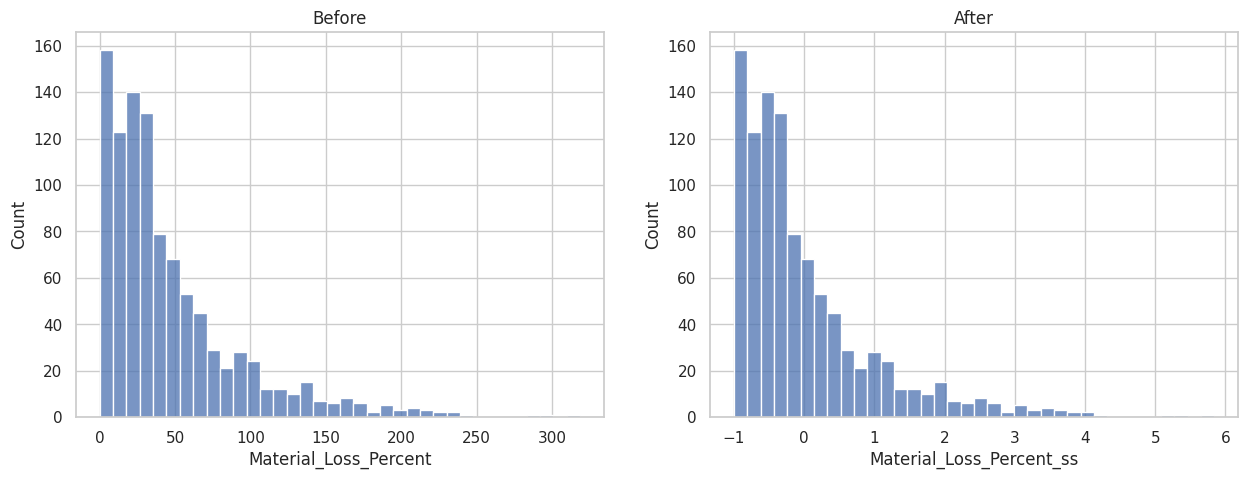

In [ ]:
# 1 mean row, 2 mean column, 1 show position 1

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("Before")
sns.histplot(data = df, x = "Material_Loss_Percent")


plt.subplot(1,2,2)
plt.title("After")
sns.histplot(data = df, x = "Material_Loss_Percent_ss")


plt.show()

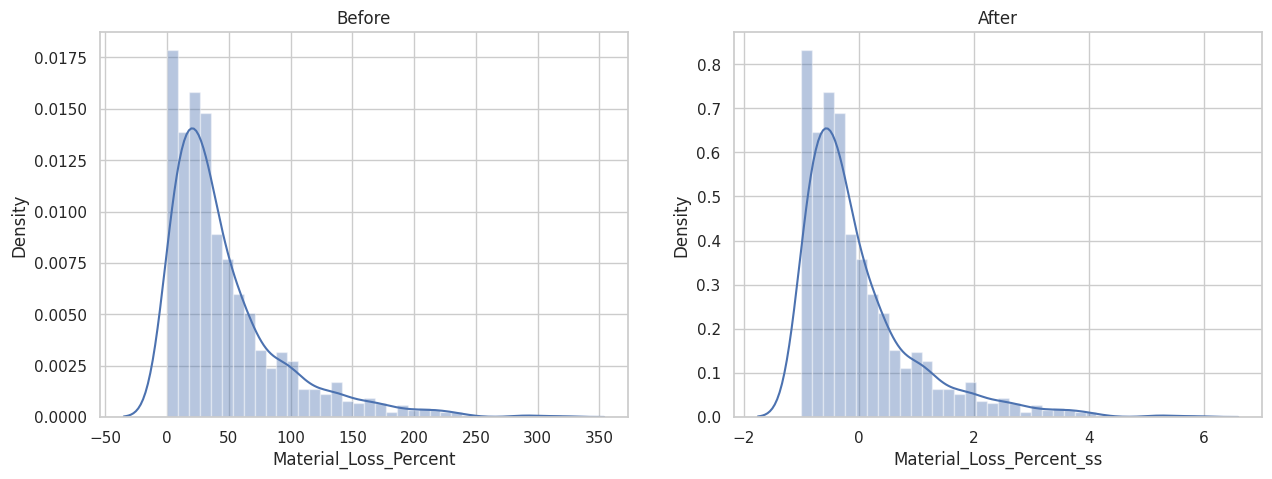

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(df["Material_Loss_Percent"])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(df["Material_Loss_Percent_ss"])


plt.show()

We can analyse that nuture of data remain same but magnitude is sharinked or reduced

Normalization(Feature scaling)

Normalization is min_max scaling technique where nature of data remain same but value is laying between maximum and minimum value of data mean 0 to 1. data is reduce according to min value and max value

X_new = X_i - min(X) / max(X) - min(X)

In [ ]:
df.head(3)

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition,Condition_en_map,z_score,Material_Loss_Percent_ss
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate,0,-0.322462,-0.322624
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical,1,-0.289202,-0.289347
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7,Critical,1,0.122363,0.122424


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
ms = MinMaxScaler()

In [ ]:
ms.fit(df[["Material_Loss_Percent"]])

MinMaxScaler()

In [ ]:
ms.transform(df[["Material_Loss_Percent"]])

array([[9.92876644e-02],
       [1.04151630e-01],
       [1.64339285e-01],
       [4.99890169e-02],
       [1.10459096e-01],
       [9.73420780e-02],
       [1.84736561e-01],
       [6.80641416e-02],
       [8.72375812e-02],
       [6.21332413e-03],
       [2.39464022e-01],
       [1.11369128e-01],
       [2.02089936e-02],
       [3.69786927e-01],
       [1.86462485e-01],
       [3.66366461e-01],
       [4.76041046e-02],
       [9.10032322e-04],
       [1.37289359e-01],
       [2.41535130e-01],
       [2.72131045e-01],
       [4.19085574e-01],
       [7.75096495e-03],
       [1.01766718e-01],
       [7.98318009e-02],
       [2.12759281e-02],
       [1.21316723e-01],
       [2.54118681e-01],
       [2.03972762e-03],
       [5.99993724e-02],
       [2.17121160e-01],
       [1.02613989e-02],
       [1.35814479e-01],
       [1.63648916e-01],
       [6.14240437e-01],
       [7.38161735e-01],
       [2.58574701e-01],
       [7.43716070e-03],
       [1.00825305e-01],
       [1.27122101e-01],


In [ ]:
Material_Loss_Percent_min_max = ms.transform(df[["Material_Loss_Percent"]])

In [ ]:
df["Material_Loss_Percent_min_max"] = Material_Loss_Percent_min_max

In [ ]:
df.head(3)

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition,Condition_en_map,z_score,Material_Loss_Percent_ss,Material_Loss_Percent_min_max
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate,0,-0.322462,-0.322624,0.099288
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical,1,-0.289202,-0.289347,0.104152
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7,Critical,1,0.122363,0.122424,0.164339


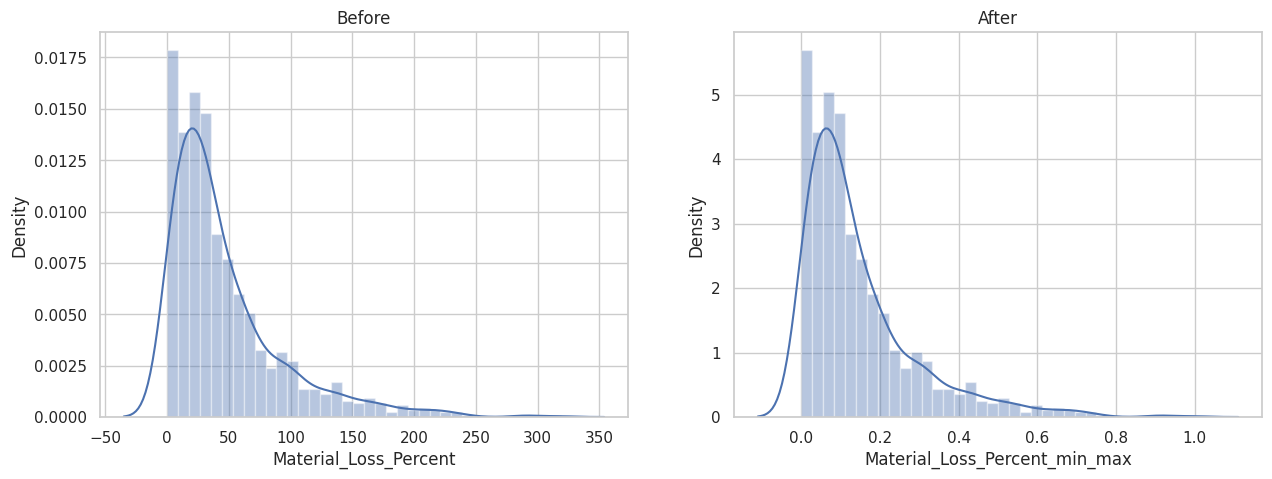

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(df["Material_Loss_Percent"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(df["Material_Loss_Percent_min_max"])

plt.show()

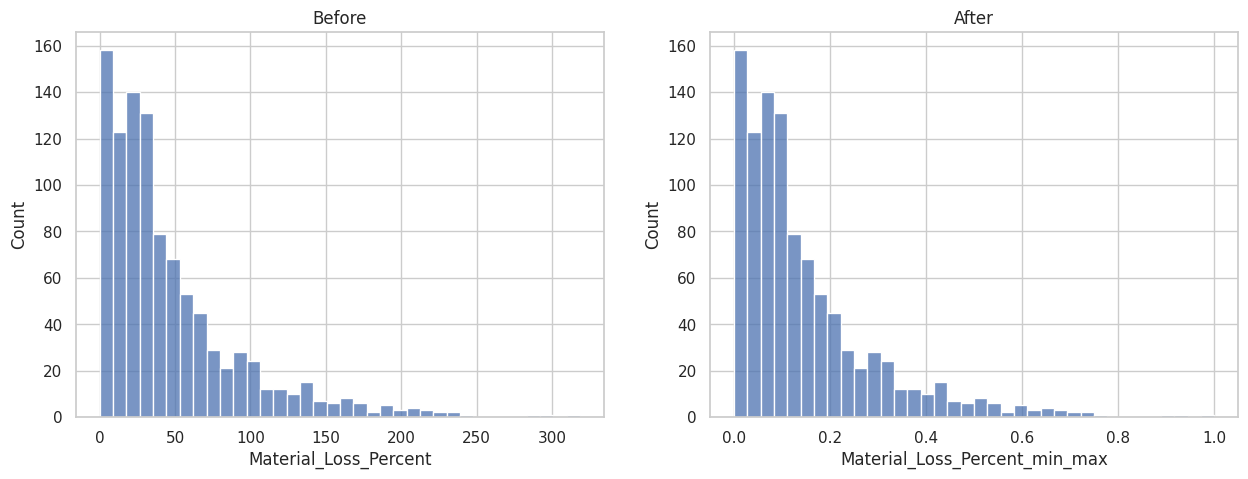

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.histplot(df["Material_Loss_Percent"])

plt.subplot(1,2,2)
plt.title("After")
sns.histplot(df["Material_Loss_Percent_min_max"])

plt.show()

###Function Transformer

if i have a non-normal distribution data in columns then covert it into normal distribution data by funtion transformer. Or function transformer is used on huge data pattern when after applying scalling there is no change in data pattern so we use funtion transformer by coverting logrithm.

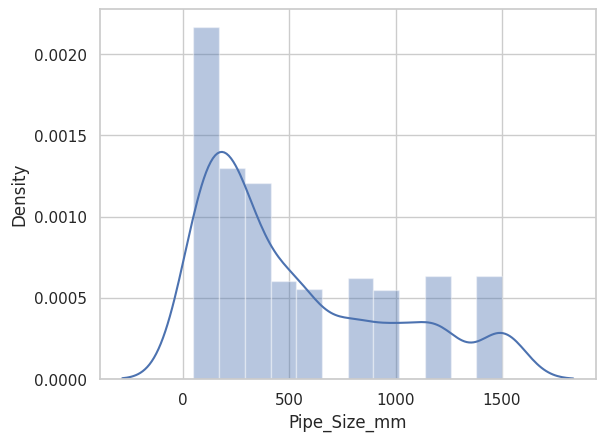

In [ ]:
sns.distplot(df["Pipe_Size_mm"])
plt.show()

In [ ]:
#use functipon transformer
# if there a value 0 then we log10 and LOGe not work, here error come beacuse value goes infinity and  so we can use log1p(1p mean 1-p)

from sklearn.preprocessing import FunctionTransformer
ft = FunctionTransformer(func = np.log1p)

In [ ]:
ft.fit(df[["Pipe_Size_mm"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [ ]:
ft.transform(df[["Pipe_Size_mm"]])

,Pipe_Size_mm
0,6.685861
1,6.685861
2,5.993961
3,7.313887
4,7.313887
...,...
995,7.313887
996,6.685861
997,4.615121
998,5.707110


In [ ]:
df["Pipe_Size_mm_tf"] = ft.transform(df[["Pipe_Size_mm"]])

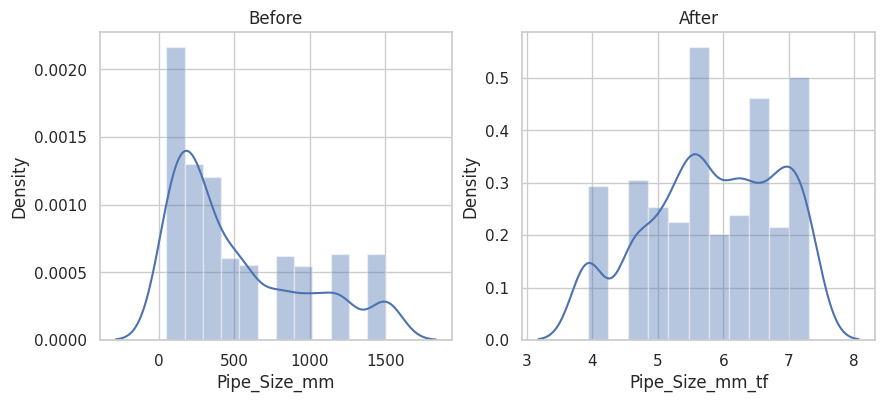

In [ ]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(df["Pipe_Size_mm"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(df["Pipe_Size_mm_tf"])
plt.show()

In above both graph we can analyse that pipe_size_mm data converted into normal distribution from non_normal distribution.

#Predictor Creation and Evaluation
Given our interest in forecasting pipeline deterioration, we create a regression model to predict Thickness_Loss_mm based on the other features. A Random Forest Regressor is used here for its robustness and minimal data scaling requirements. We also perform a train-test split and evaluate model performance using the R² score.

Note: In practice, one might try several models and perform hyperparameter tuning. This example keeps things concise, with a pinch of dry humor in the mixing.

###Model development

####Train test split in Dataset

Train test split in Dataset

In [ ]:
df.head(3)

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition,Condition_en_map,z_score,Material_Loss_Percent_ss,Material_Loss_Percent_min_max,Pipe_Size_mm_tf
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate,0,-0.322462,-0.322624,0.099288,6.685861
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical,1,-0.289202,-0.289347,0.104152,6.685861
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7,Critical,1,0.122363,0.122424,0.164339,5.993961


First choose output from input, here output is weather a condition is normal, moderate or critical(0,1,2) of pipe. so column "Condition_en_map" is output.

In [ ]:
input_data = df.iloc[:,:-6]

input_data.head(3)

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7


In [ ]:
output_data = df["Condition_en_map"]

output_data.head(3)

,Condition_en_map
0,0
1,1
2,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size = 0.25)

Input Data

In [ ]:
x_train

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years
926,100,4.08,HDPE,ASTM A106 Grade B,2500,66.9,1.39,9.45,231.62,20
967,100,6.37,Carbon Steel,API 5L X42,900,37.8,2.89,7.99,125.43,13
596,250,7.48,Stainless Steel,ASTM A333 Grade 6,2500,22.4,16.24,1.07,14.30,8
192,50,5.22,PVC,ASTM A106 Grade B,900,110.5,18.51,7.59,145.40,10
217,1200,20.66,HDPE,API 5L X42,150,118.5,11.43,8.42,40.76,5
...,...,...,...,...,...,...,...,...,...,...
441,600,13.23,Stainless Steel,API 5L X42,300,148.2,4.96,7.11,53.74,10
62,800,19.87,Stainless Steel,ASTM A106 Grade B,600,20.3,7.60,4.65,23.40,7
75,300,16.31,Carbon Steel,ASTM A333 Grade 6,2500,-37.4,4.32,5.54,33.97,25
879,300,8.56,Fiberglass,API 5L X52,150,114.4,6.52,4.85,56.66,13


In [ ]:
x_test

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years
243,1500,43.20,Carbon Steel,ASTM A333 Grade 6,900,48.7,13.27,5.50,12.73,4
522,150,7.97,Fiberglass,API 5L X42,150,81.8,5.16,9.05,113.55,20
438,500,9.71,Carbon Steel,API 5L X65,900,24.1,10.87,1.93,19.88,25
969,300,8.96,Fiberglass,API 5L X52,2500,43.2,3.80,1.19,13.28,12
828,500,24.71,Fiberglass,ASTM A106 Grade B,1500,117.0,15.95,3.69,14.93,13
...,...,...,...,...,...,...,...,...,...,...
898,250,14.97,Carbon Steel,ASTM A106 Grade B,150,-17.1,10.00,4.73,31.60,21
209,50,4.50,PVC,API 5L X42,150,48.2,18.04,0.25,5.56,12
177,1500,35.00,Carbon Steel,API 5L X42,1500,32.3,1.14,1.92,5.49,16
960,300,17.77,PVC,ASTM A333 Grade 6,600,74.0,12.62,5.54,31.18,9


In above 250 data(25%) is used for testing purpose and 570(75%) data is used for training purpose.

Output Data

In [ ]:
y_train

,Condition_en_map
926,1
967,1
596,2
192,1
217,1
...,...
441,1
62,0
75,1
879,0


In [ ]:
y_test

,Condition_en_map
243,1
522,1
438,2
969,2
828,0
...,...
898,0
209,2
177,2
960,1


Here x shows input and y shows output, 25 persent data is for testing purpose. i split data in 75 and 25 ratio, This analysis can be show below:

In [ ]:
df.shape

(1000, 16)

In [ ]:
x_train.shape, y_train.shape

((750, 10), (750,))

In [ ]:
x_test.shape, y_test.shape

((250, 10), (250,))

###Classification Analysis

This is classification analysis where condition of pipe is normal, moderate or critical.

All above multiple inputs are in object type so convert it into integer type for machine learning algorithm

In [ ]:
x_train.head(3)

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years
926,100,4.08,HDPE,ASTM A106 Grade B,2500,66.9,1.39,9.45,231.62,20
967,100,6.37,Carbon Steel,API 5L X42,900,37.8,2.89,7.99,125.43,13
596,250,7.48,Stainless Steel,ASTM A333 Grade 6,2500,22.4,16.24,1.07,14.30,8


In [ ]:
df["Material"].unique()

array(['Carbon Steel', 'PVC', 'HDPE', 'Fiberglass', 'Stainless Steel'],
      dtype=object)

In [ ]:
df["Grade"].unique()

array(['ASTM A333 Grade 6', 'ASTM A106 Grade B', 'API 5L X52',
       'API 5L X42', 'API 5L X65'], dtype=object)

In [ ]:
x_train = pd.get_dummies(x_train, columns = ['Material', 'Grade'])
x_train.head(3)

,Pipe_Size_mm,Thickness_mm,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Material_Carbon Steel,Material_Fiberglass,Material_HDPE,Material_PVC,Material_Stainless Steel,Grade_API 5L X42,Grade_API 5L X52,Grade_API 5L X65,Grade_ASTM A106 Grade B,Grade_ASTM A333 Grade 6
926,100,4.08,2500,66.9,1.39,9.45,231.62,20,False,False,True,False,False,False,False,False,True,False
967,100,6.37,900,37.8,2.89,7.99,125.43,13,True,False,False,False,False,True,False,False,False,False
596,250,7.48,2500,22.4,16.24,1.07,14.30,8,False,False,False,False,True,False,False,False,False,True


In [ ]:
pd.get_dummies(x_test, columns = ['Material', 'Grade'])
x_test.head(3)

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years
243,1500,43.20,Carbon Steel,ASTM A333 Grade 6,900,48.7,13.27,5.50,12.73,4
522,150,7.97,Fiberglass,API 5L X42,150,81.8,5.16,9.05,113.55,20
438,500,9.71,Carbon Steel,API 5L X65,900,24.1,10.87,1.93,19.88,25


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
lr.score(x_test, y_test)*100

62.0

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
model = LogisticRegression(multi_class = 'multinomial', solver = 'saga', max_iter = 1000)

In [ ]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga')

In [ ]:
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.64

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.34      0.42        53
           1       0.63      0.87      0.73        60
           2       0.72      0.70      0.71        37

    accuracy                           0.64       150
   macro avg       0.64      0.64      0.62       150
weighted avg       0.63      0.64      0.62       150



In [ ]:
from mlxtend.plotting import plot_decision_regions

###Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pf = PolynomialFeatures(degree=3)
pf.fit(x_train)
pf.transform(x_train)

array([[  1.  , 300.  ,   7.2 , ...,   0.  ,   0.  ,   0.  ],
       [  1.  , 300.  ,   9.39, ...,   0.  ,   0.  ,   0.  ],
       [  1.  , 400.  ,  17.39, ...,   0.  ,   0.  ,   0.  ],
       ...,
       [  1.  , 100.  ,   5.17, ...,   0.  ,   0.  ,   0.  ],
       [  1.  , 100.  ,   6.95, ...,   0.  ,   0.  ,   0.  ],
       [  1.  , 150.  ,   5.98, ...,   0.  ,   0.  ,   0.  ]])

In [ ]:
x = pd.DataFrame(pf.transform(x_train))

In [ ]:
x

,0,1,2,3,4,5,6,7,8,9,...,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329
0,1.0,300.0,7.20,300.0,48.5,17.27,8.07,112.08,20.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,300.0,9.39,150.0,41.2,11.27,4.09,43.56,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,400.0,17.39,150.0,-12.8,12.59,7.23,41.58,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,250.0,9.07,300.0,4.6,10.86,7.99,88.09,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1000.0,31.79,2500.0,19.9,7.87,8.45,26.58,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1.0,200.0,7.19,300.0,11.7,1.68,3.99,55.49,7.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
596,1.0,500.0,22.00,900.0,28.7,10.30,0.18,0.82,16.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
597,1.0,100.0,5.17,300.0,-3.3,17.88,7.56,146.23,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
598,1.0,100.0,6.95,2500.0,88.3,13.98,9.08,130.65,25.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
lr.score(x_test, y_test)*100

62.0

In [ ]:
df.head(2)

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition,Condition_en_map,z_score,Material_Loss_Percent_ss,Material_Loss_Percent_min_max,Pipe_Size_mm_tf
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate,0,-0.322462,-0.322624,0.099288,6.685861
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical,1,-0.289202,-0.289347,0.104152,6.685861


In [ ]:
df1 = pd.read_csv('/content/market_pipe_thickness_loss_dataset.csv')
df.head(3)

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition,Condition_en_map,z_score,Material_Loss_Percent_ss,Material_Loss_Percent_min_max,Pipe_Size_mm_tf
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate,0,-0.322462,-0.322624,0.099288,6.685861
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical,1,-0.289202,-0.289347,0.104152,6.685861
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7,Critical,1,0.122363,0.122424,0.164339,5.993961


In [ ]:
df1['Material'].unique()

array(['Carbon Steel', 'PVC', 'HDPE', 'Fiberglass', 'Stainless Steel'],
      dtype=object)

In [ ]:
df1['Grade'].unique()

array(['ASTM A333 Grade 6', 'ASTM A106 Grade B', 'API 5L X52',
       'API 5L X42', 'API 5L X65'], dtype=object)

In [ ]:
df1['Condition'].unique()

array(['Moderate', 'Critical', 'Normal'], dtype=object)

Using map function

In [ ]:
df1['Material'] = df1['Material'].map({'Carbon Steel':0, 'PVC':1, 'HDPE':2, 'Fiberglass':3, 'Stainless Steel':4})

df1['Grade'] = df1['Grade'].map({'ASTM A333 Grade 6':0, 'ASTM A106 Grade B':1,
                                              'API 5L X52': 2 ,'API 5L X42':3, 'API 5L X65':4})

df1['Condition'] = df1['Condition'].map({'Moderate':1, 'Critical':2, 'Normal':0})

In [ ]:
df1.head(10)

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition
0,800,15.48,0,0,300,84.9,16.04,4.91,31.72,2,1
1,800,22.00,1,1,150,14.1,7.38,7.32,33.27,4,2
2,400,12.05,0,2,2500,0.6,2.12,6.32,52.45,7,2
3,1500,38.72,0,3,1500,52.7,5.58,6.20,16.01,19,2
4,1500,24.32,2,4,1500,11.7,12.29,8.58,35.28,20,2
5,600,16.75,3,2,600,67.3,2.06,5.21,31.10,11,2
6,200,9.94,0,1,1500,89.6,1.34,5.86,58.95,6,2
7,300,13.87,0,1,900,40.8,5.57,3.02,21.77,21,1
8,150,8.86,3,4,300,3.2,13.84,2.47,27.88,19,1
9,800,25.78,4,0,150,11.6,18.68,0.53,2.06,1,0


In [ ]:
input_data = df1.iloc[:,:-1]

x = input_data
x.head(3)

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years
0,800,15.48,0,0,300,84.9,16.04,4.91,31.72,2
1,800,22.00,1,1,150,14.1,7.38,7.32,33.27,4
2,400,12.05,0,2,2500,0.6,2.12,6.32,52.45,7


In [ ]:
output_data = df1["Condition"]

y = output_data
y.head(3)

,Condition
0,1
1,2
2,2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y, test_size = 0.2, random_state = 42)

###Classification Analysis

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train1, y_train1)

LogisticRegression()

In [ ]:
lr.score(x_test1, y_test1)*100

70.0

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model = LogisticRegression(multi_class = 'multinomial', solver = 'saga', max_iter = 1000)
model.fit(x_train1, y_train1)

model.fit(x_train1, y_train1)

y_pred = model.predict(x_test1)

In [ ]:
print("Accuracy:", accuracy_score(y_test1, y_pred))

print("\nClassification Report:\n", classification_report(y_test1, y_pred))

Accuracy: 0.675

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.69      0.73        51
           1       0.56      0.30      0.39        61
           2       0.67      0.93      0.78        88

    accuracy                           0.68       200
   macro avg       0.67      0.64      0.63       200
weighted avg       0.66      0.68      0.65       200



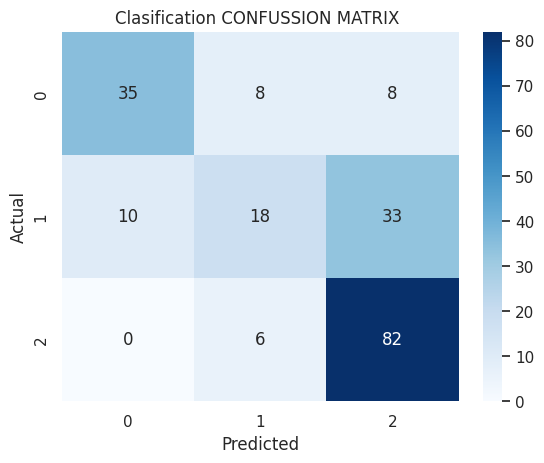

In [ ]:
cm = confusion_matrix(y_test1, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title("Clasification CONFUSSION MATRIX ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###Support vector machine (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel = 'rbf', probability = True)

In [ ]:
model.fit(x_train1, y_train1)

SVC(probability=True)

In [ ]:
y_pred = model.predict(x_test1)

In [ ]:
accuracy = accuracy_score(y_test1, y_pred)*100

In [ ]:
accuracy

44.0

In [ ]:
print("\nClassification Report:\n", classification_report(y_test1, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.00      0.00      0.00        61
           2       0.44      1.00      0.61        88

    accuracy                           0.44       200
   macro avg       0.15      0.33      0.20       200
weighted avg       0.19      0.44      0.27       200



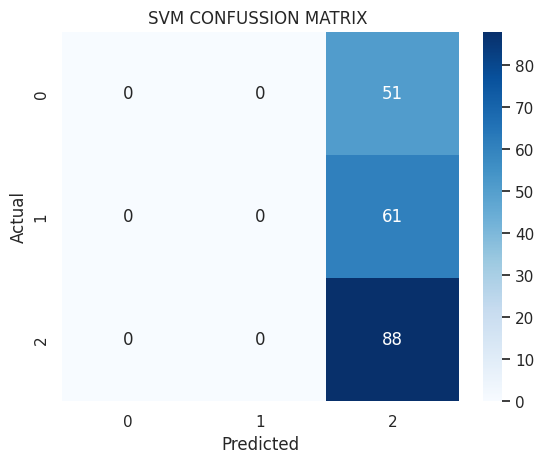

In [ ]:
cm = confusion_matrix(y_test1, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title("SVM CONFUSSION MATRIX ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###KNN algorothms

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(x_train1, y_train1)



y_pred = model.predict(x_test1)

In [ ]:
accuracy = accuracy_score(y_test1, y_pred)*100

In [ ]:
print(accuracy)

54.50000000000001


In [ ]:
print("\nClassification Report:\n", classification_report(y_test1, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.41      0.45        51
           1       0.39      0.41      0.40        61
           2       0.68      0.72      0.70        88

    accuracy                           0.55       200
   macro avg       0.52      0.51      0.51       200
weighted avg       0.54      0.55      0.54       200



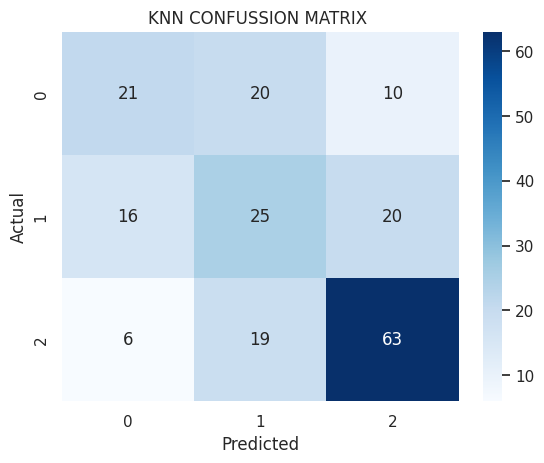

In [ ]:
cm = confusion_matrix(y_test1, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title("KNN CONFUSSION MATRIX ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
model = GradientBoostingClassifier()
model.fit(x_train1, y_train1)

y_pred = model.predict(x_test1)

accuracy = accuracy_score(y_test1, y_pred)*100

In [ ]:
accuracy

100.0

In [ ]:
print("\nClassification Report:\n", classification_report(y_test1, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        88

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



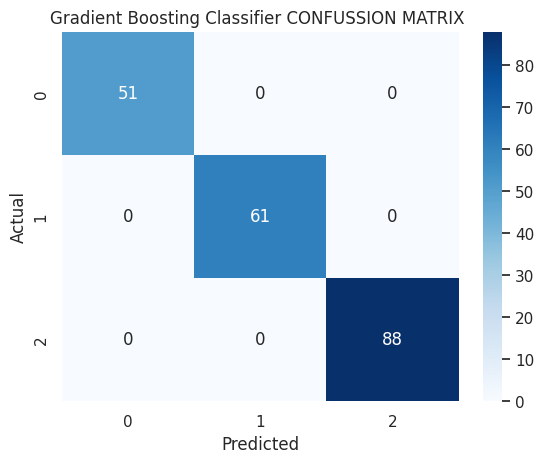

In [ ]:
cm = confusion_matrix(y_test1, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title("Gradient Boosting Classifier CONFUSSION MATRIX ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()
model.fit(x_train1, y_train1)

y_pred = model.predict(x_test1)

accuracy = accuracy_score(y_test1, y_pred)*100

In [ ]:
accuracy

100.0

In [ ]:
print("\nClassification Report:\n", classification_report(y_test1, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        88

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



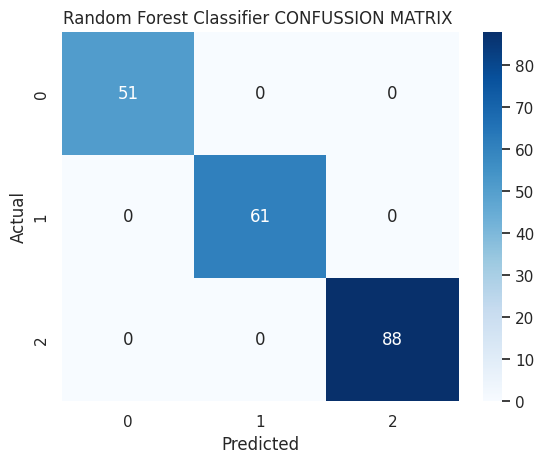

In [ ]:
cm = confusion_matrix(y_test1, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title("Random Forest Classifier CONFUSSION MATRIX ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

If output is Thickness_Loss_mm then use regression analysis

In [ ]:
# Prepare data for prediction

# Our target variable will be 'Thickness_Loss_mm'
target = 'Thickness_Loss_mm'

# We'll use all other columns except the target. For categorical variables, we use one-hot encoding.
features = df.drop(columns=[target])

# Convert categorical variables using one-hot encoding
features = pd.get_dummies(features, drop_first=True)

# Define X and y
X = features
y = df[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Instantiate and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model using R² score
score = r2_score(y_test, y_pred)
print(f'R² Score of the Random Forest Regressor: {score:.2f}')

R² Score of the Random Forest Regressor: 0.98


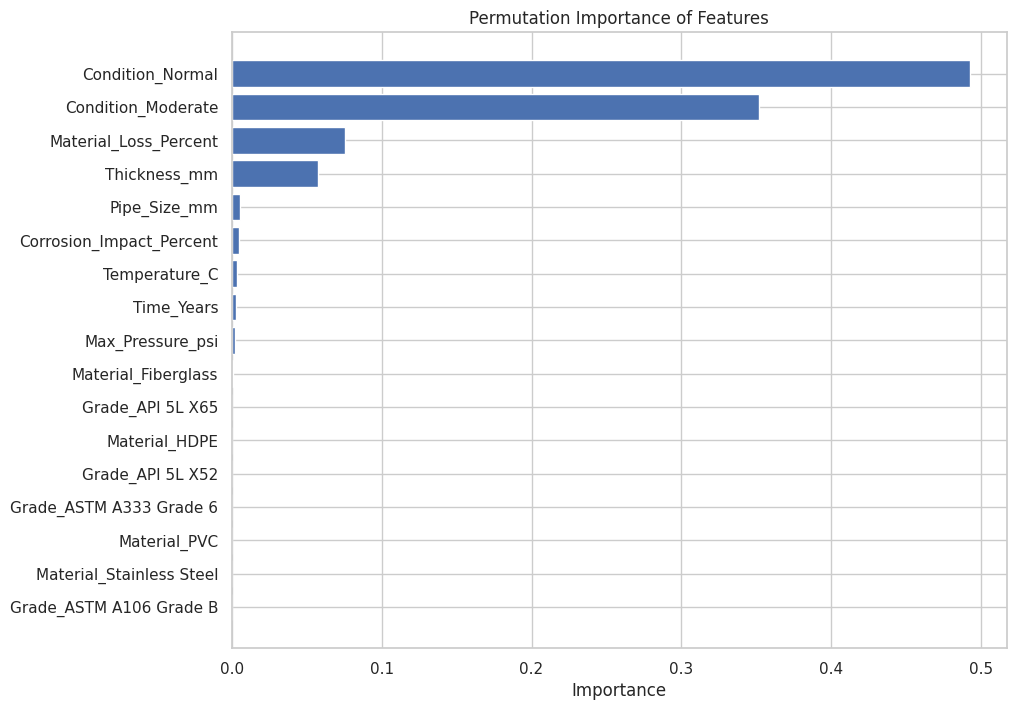

In [ ]:
# Optional: Feature Importance Plot
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title('Permutation Importance of Features')
plt.xlabel('Importance')
plt.show()

#Conclusions and Future Work
The analysis has provided interesting insights into the interplay between various pipeline features and deterioration measures. The Random Forest Regressor delivered a respectable R² score, suggesting that features such as pipe size, temperature, and corrosion impact are valuable indicators of thickness loss.

For future work, further experimentation with hyperparameter tuning, cross-validation, or trying different model families could enhance predictive performance. Additionally, exploring time-based analysis may offer insights if temporal data becomes available.